##### ALGORITMO DE WHITE PATCH

In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [3]:
# Funcion para aplicar white patch a las imagenes
def white_patch(imagen):
    imagen_b, imagen_g, imagen_r = cv.split(imagen)
    factor_b = 255 / imagen_b.max()
    factor_g = 255 / imagen_g.max()
    factor_r = 255 / imagen_r.max()
    new_imagen = cv.merge((imagen_b*factor_b,imagen_g*factor_g,imagen_r*factor_r))
    new_imagen = new_imagen.astype(np.uint8)
    return new_imagen,factor_b,factor_g,factor_r

In [6]:
# Cargamos las imagenes
test_blue = cv.imread('C:/Users\juana\OneDrive\Documentos\IA\CEIA\VPC1\Material_TPs\TP1\white_patch/test_blue.png')
test_green = cv.imread('C:/Users\juana\OneDrive\Documentos\IA\CEIA\VPC1\Material_TPs\TP1\white_patch/test_green.png')
test_red = cv.imread('C:/Users\juana\OneDrive\Documentos\IA\CEIA\VPC1\Material_TPs\TP1\white_patch/test_red.png')
wp_blue = cv.imread('C:/Users\juana\OneDrive\Documentos\IA\CEIA\VPC1\Material_TPs\TP1\white_patch\wp_blue.jpg')
wp_green = cv.imread('C:/Users\juana\OneDrive\Documentos\IA\CEIA\VPC1\Material_TPs\TP1\white_patch\wp_green.png')
wp_green3 = cv.imread('C:/Users\juana\OneDrive\Documentos\IA\CEIA\VPC1\Material_TPs\TP1\white_patch\wp_green3.jpg')
wp_no_white = cv.imread('C:/Users\juana\OneDrive\Documentos\IA\CEIA\VPC1\Material_TPs\TP1\white_patch\wp_no_white.png')
wp_red = cv.imread('C:/Users\juana\OneDrive\Documentos\IA\CEIA\VPC1\Material_TPs\TP1\white_patch\wp_red.png')
wp_red2 = cv.imread('C:/Users\juana\OneDrive\Documentos\IA\CEIA\VPC1\Material_TPs\TP1\white_patch\wp_red2.jpg')

In [7]:
# Aplicamos la funcion white patch a cada una de las imagenes
new_test_blue,new_test_blue_fb,new_test_blue_fg,new_test_blue_fr = white_patch(test_blue)
new_test_green,new_test_green_fb,new_test_green_fg,new_test_green_fr = white_patch(test_green)
new_test_red,new_test_red_fb,new_test_red_fg,new_test_red_fr = white_patch(test_red)
new_wp_blue,new_wp_blue_fb,new_wp_blue_fg,new_wp_blue_fr = white_patch(wp_blue)
new_wp_green,new_wp_green_fb,new_wp_green_fg,new_wp_green_fr = white_patch(wp_green)
new_wp_green3,new_wp_green3_fb,new_wp_green3_fg,new_wp_green3_fr = white_patch(wp_green3)
new_wp_no_white,new_wp_no_white_fb,new_wp_no_white_fg,new_wp_no_white_fr = white_patch(wp_no_white)
new_wp_red,new_wp_red_fb,new_wp_red_fg,new_wp_red_fr = white_patch(wp_red)
new_wp_red2,new_wp_red2_fb,new_wp_red2_fg,new_wp_red2_fr = white_patch(wp_red2)

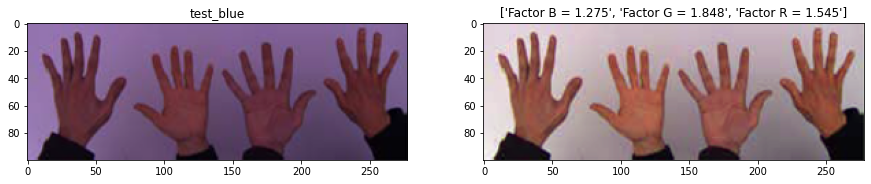

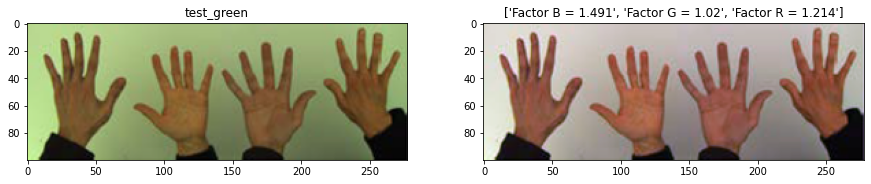

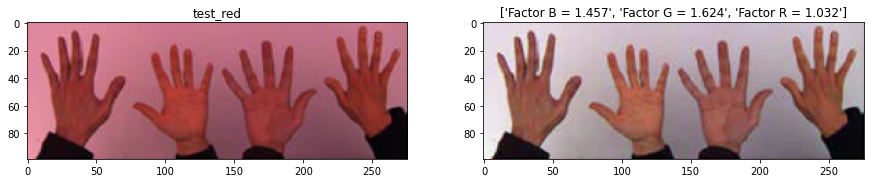

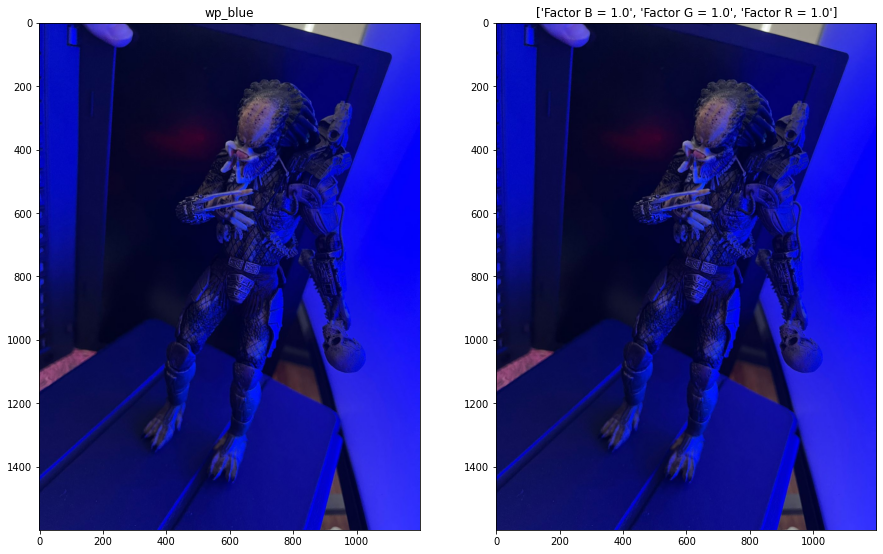

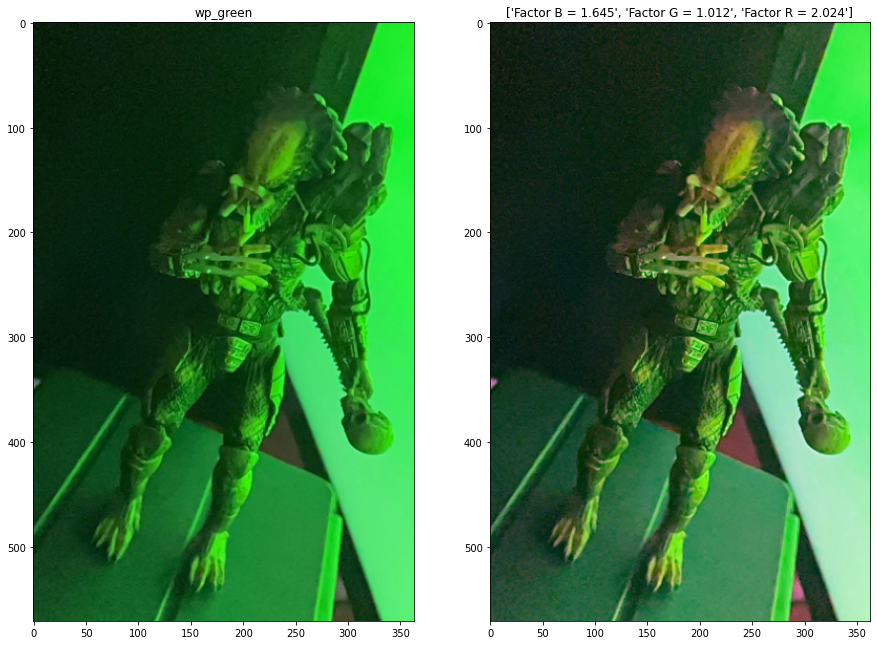

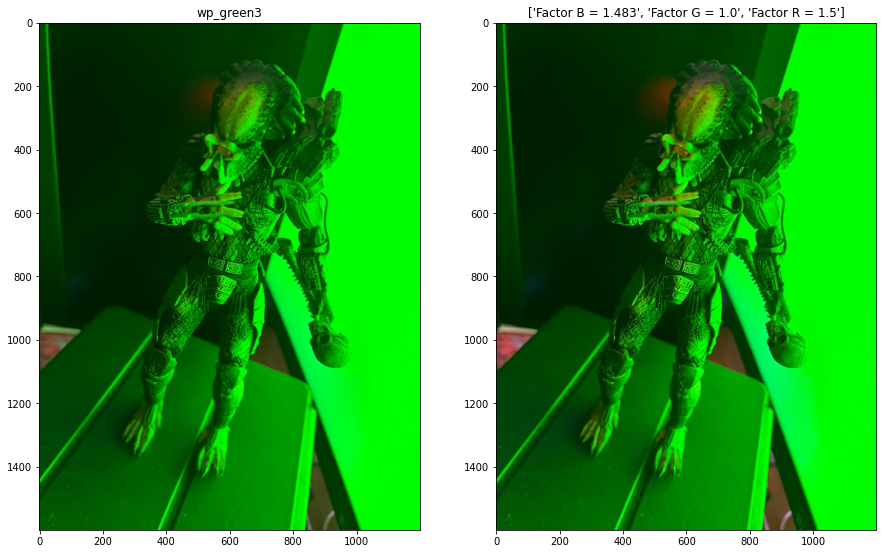

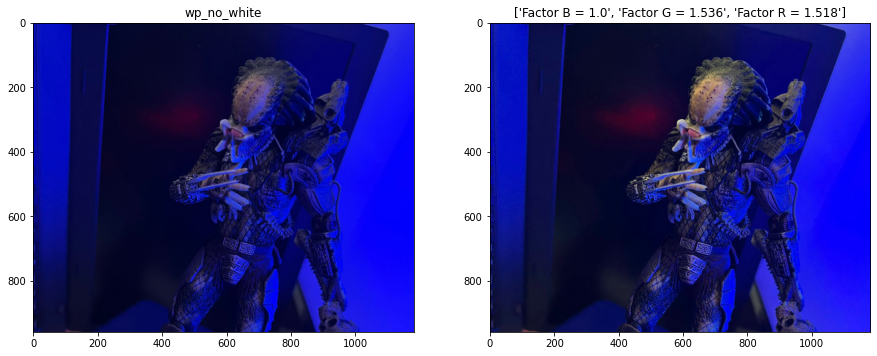

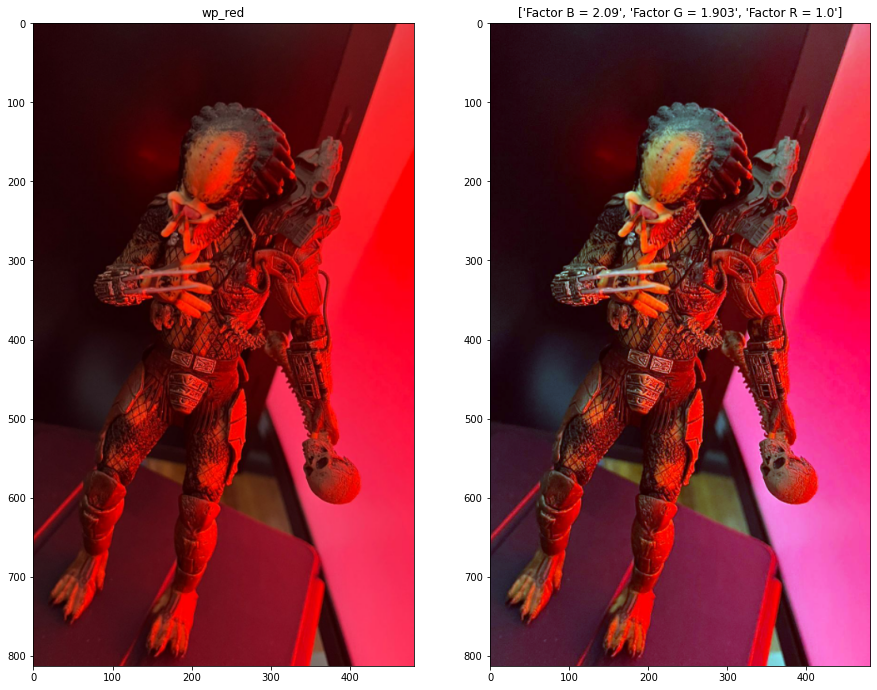

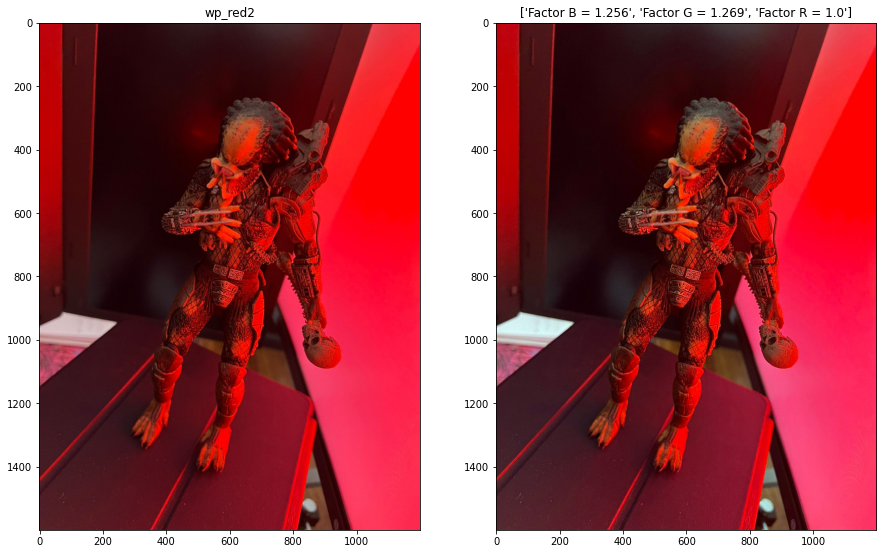

In [8]:
# Ploteamos las imagenes
# Definimos una lista con el nombre de las imegenes originales y las nuevas
images = [test_blue,test_green,test_red,wp_blue,wp_green,wp_green3,wp_no_white,wp_red,wp_red2]
new_images = [new_test_blue,new_test_green,new_test_red,new_wp_blue,new_wp_green,new_wp_green3,new_wp_no_white,new_wp_red,new_wp_red2]

name = ['test_blue','test_green','test_red','wp_blue','wp_green','wp_green3','wp_no_white','wp_red','wp_red2']

# Definimos una lista con los factores que aplico la funcion en cada uno de los canales de cada imegen
factor_b = [new_test_blue_fb,new_test_green_fb,new_test_red_fb,new_wp_blue_fb,new_wp_green_fb,new_wp_green3_fb,new_wp_no_white_fb,new_wp_red_fb,new_wp_red2_fb]
factor_g = [new_test_blue_fg,new_test_green_fg,new_test_red_fg,new_wp_blue_fg,new_wp_green_fg,new_wp_green3_fg,new_wp_no_white_fg,new_wp_red_fg,new_wp_red2_fg]
factor_r = [new_test_blue_fr,new_test_green_fr,new_test_red_fr,new_wp_blue_fr,new_wp_green_fr,new_wp_green3_fr,new_wp_no_white_fr,new_wp_red_fr,new_wp_red2_fr]

for i in range(len(images)):
    original = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)
    nueva = cv.cvtColor(new_images[i], cv.COLOR_BGR2RGB)
    plt.figure(i,figsize=(15,15))
    plt.subplot(1, 2, 1)
    plt.title(name[i])       
    plt.imshow(original)
    plt.subplot(1, 2, 2)
    plt.title(['Factor B = {}'.format(round(factor_b[i],3)), 'Factor G = {}'.format(round(factor_g[i],3)), 'Factor R = {}'.format(round(factor_r[i],3))]) 
    plt.imshow(nueva)

El problema con la tecnica de White Patch es en el caso que la imagen tengo un punto blanco puro (255, 255, 255), la imagen transformada no se altera respecto a la original, ya que los factores son 1 en los 3 canales(es el caso de la imagen "wp_blue"). En ese caso podriamos aislar esa zona para evitar este punto.